In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("house_data.csv")

In [3]:
df .head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Analysis

In [4]:
df.describe() #statistical analysis

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.info() # #basic idea that we get from the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
# using isnull() function to see if any null data is available in the data set 
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Data Processing

#### Removing the columns that are not required for the analysis

In [7]:
# Dropping the fields Date, Street, Satezip, country.

df.drop(df.columns[[0, 14,16,17]], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [8]:
df .info() # To find if there is any column that is not int or float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.2+ KB


### Converting categorical variables of the dataset into numerical variables - using ONE HOT ENCODING technique

In [9]:
df.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [10]:
df['city']=df['city'].apply({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                                 'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':12,'Kirkland':13,'Issaquah':14,
                                 'Woodinville':15,'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,
                                 'Duvall':21,'Burien':22,'Covington':23,'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,
                                 'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,'Skykomish':32,'Tukwila':33,'Vashon':34,
                                 'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,'Pacific':40,'Beaux Arts Village':41,
                                'Preston':42,'Milton':43}.get)

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4


### Multiple Features (N-Dimensional)

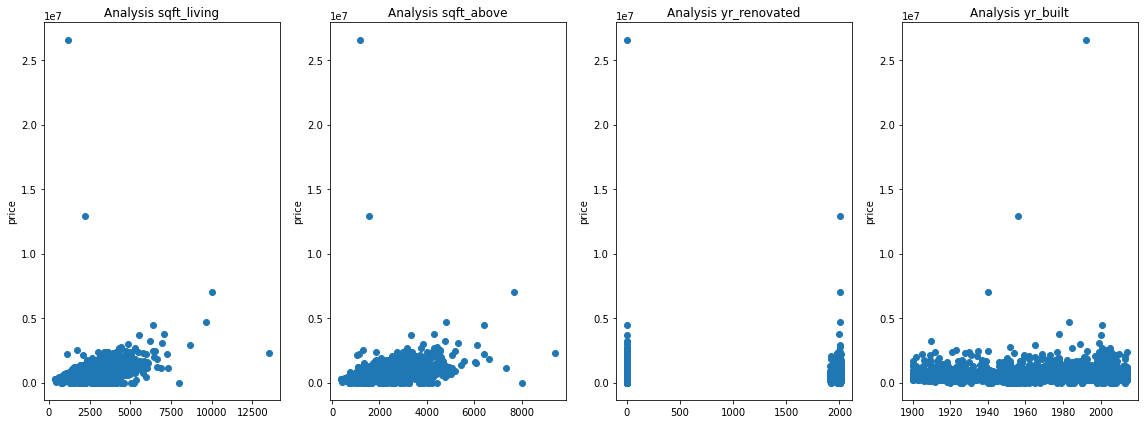

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))

axes[0].plot(df['sqft_living'],df['price'],'o')
axes[0].set_ylabel("price")
axes[0].set_title("Analysis sqft_living")

axes[1].plot(df['sqft_above'],df['price'],'o')
axes[1].set_ylabel("price")
axes[1].set_title("Analysis sqft_above")

axes[2].plot(df['yr_renovated'],df['price'],'o')
axes[2].set_title("Analysis yr_renovated");
axes[2].set_ylabel("price")

axes[3].plot(df['yr_built'],df['price'],'o')
axes[3].set_ylabel("price")
axes[3].set_title("Analysis yr_built")
plt.tight_layout();

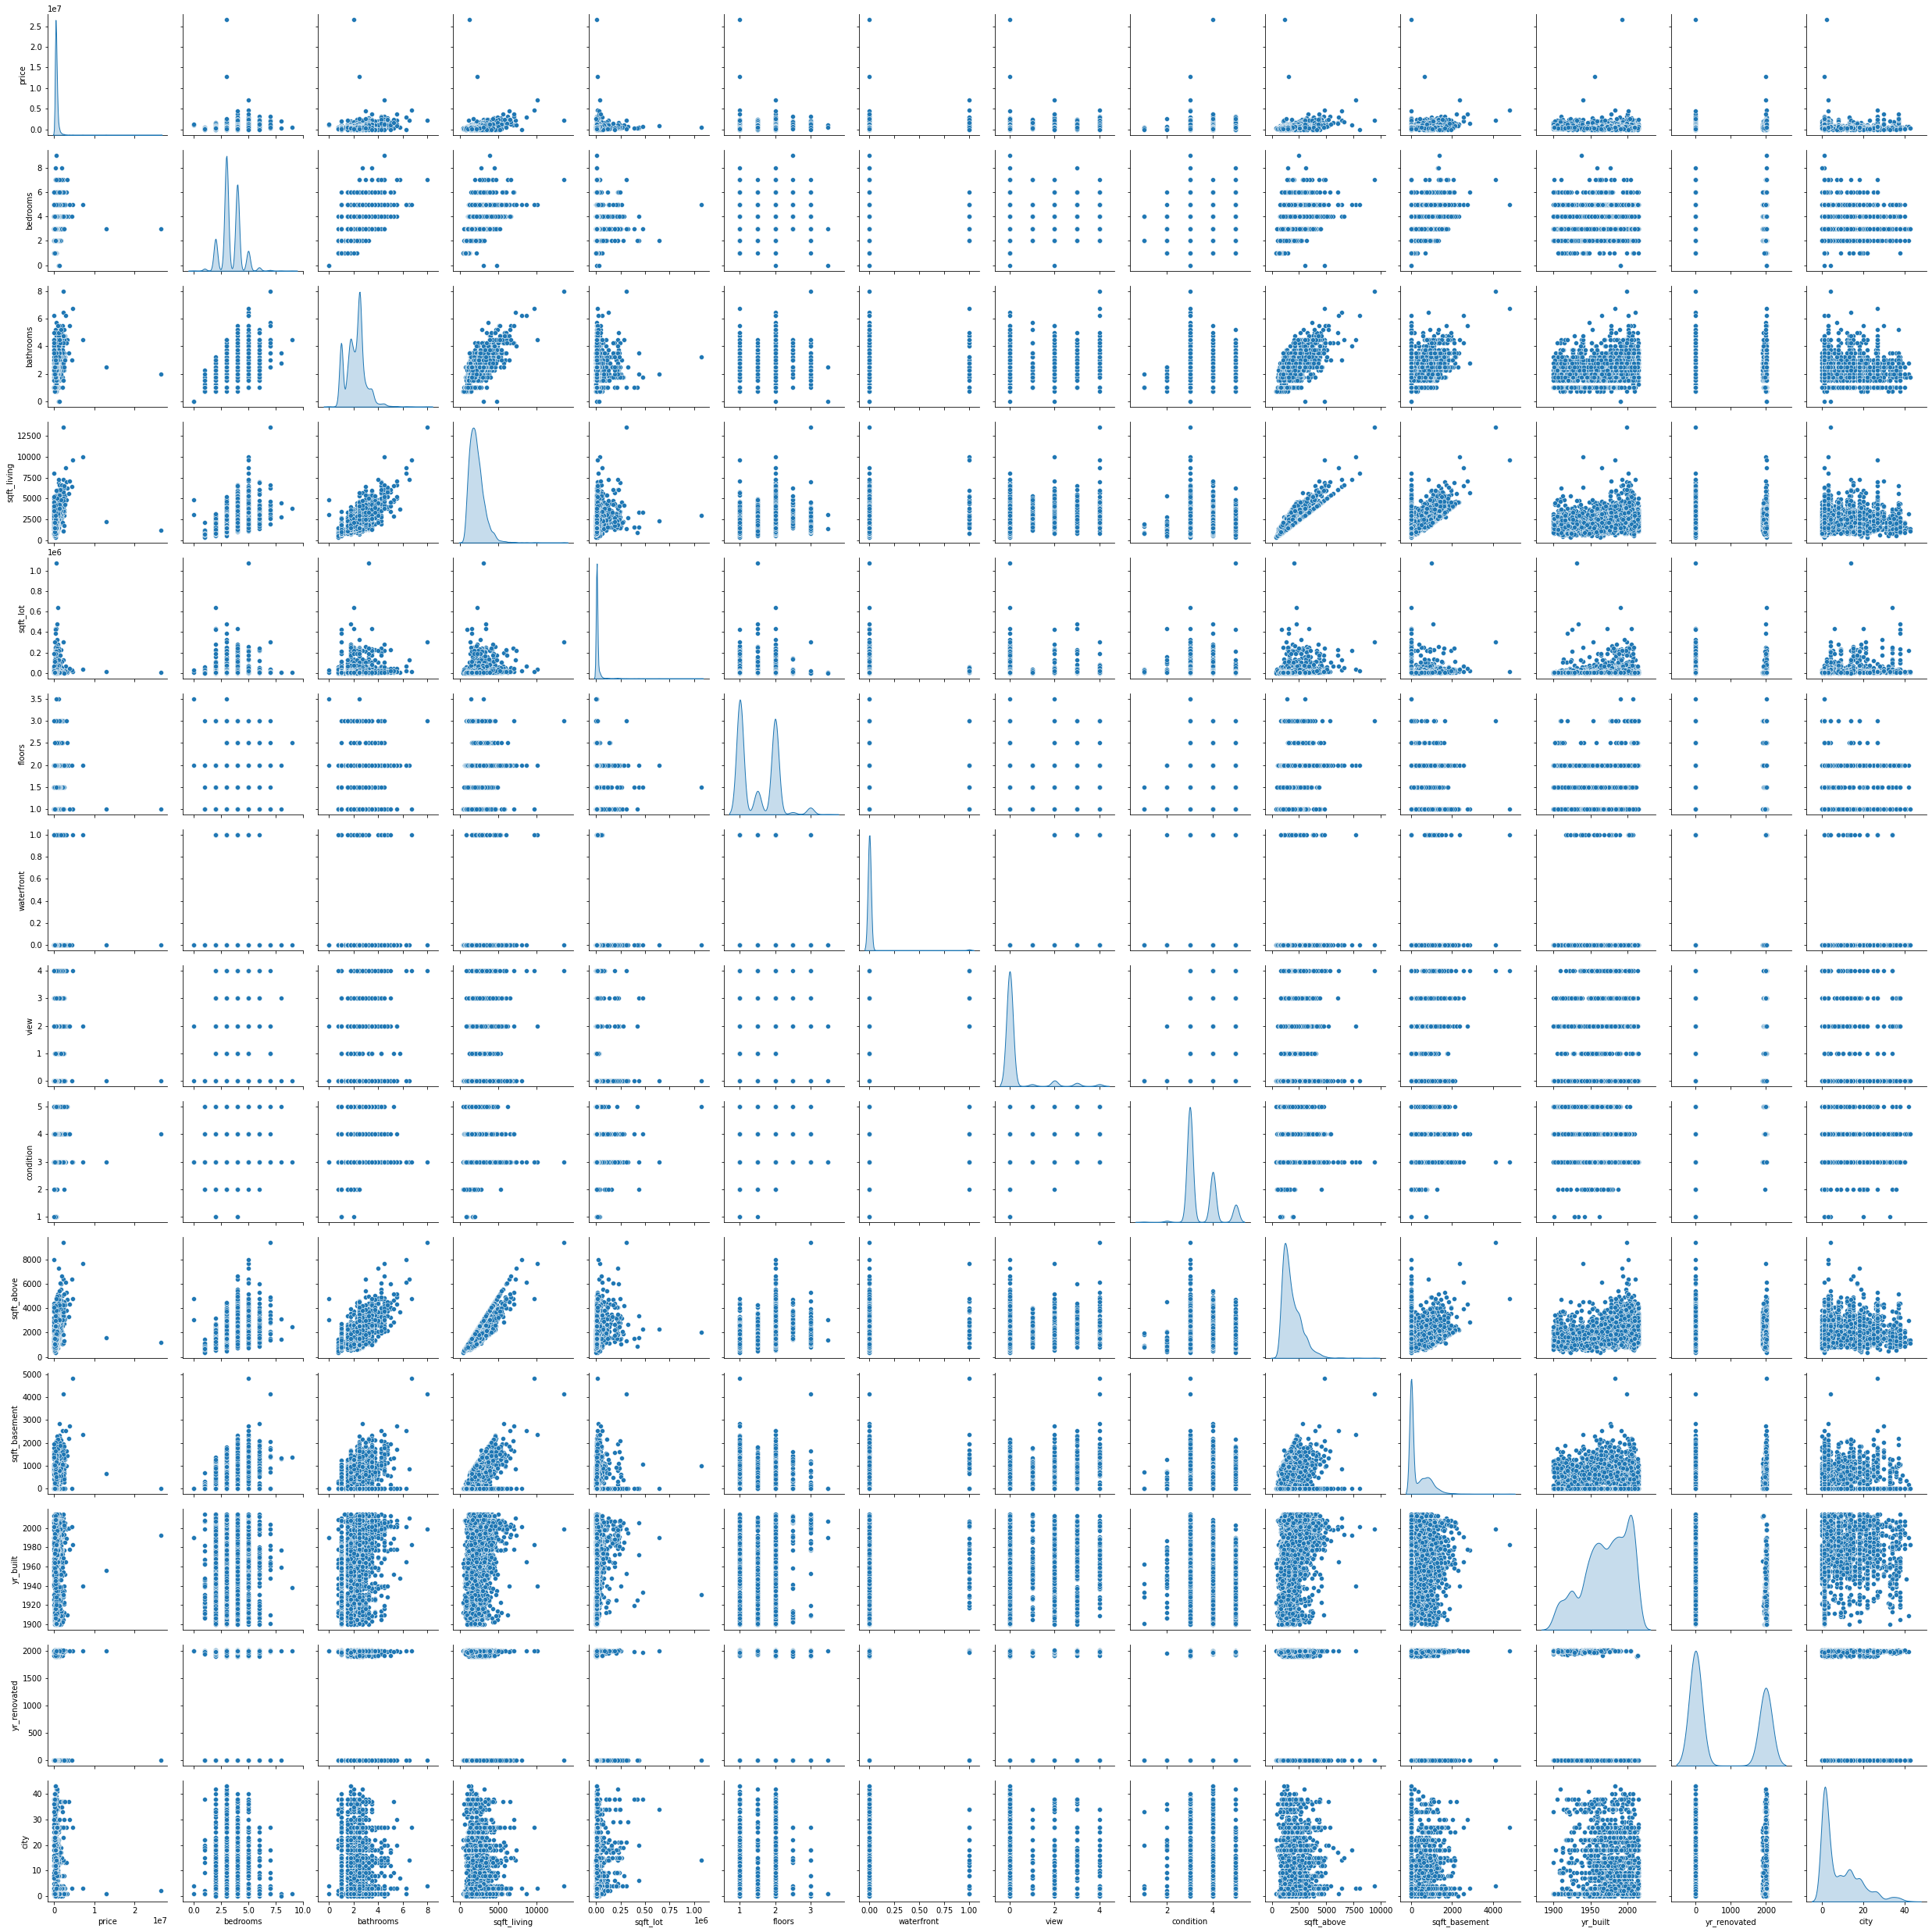

In [13]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

# Dividing Dataset into Dependent and Independent columns

In [14]:
X= df.drop('price',axis=1)
y=df['price']

# Splitting the dataset into training and testing set
### 30% of the dataset will be used for testing(evaluation) and 70% of the data will be used for training purposes

In [15]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [16]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
2195,3.0,1.50,1290,1286,3.0,0,0,3,1290,0,2000,0,1
631,3.0,1.00,1700,4400,1.5,0,0,4,1700,0,1906,1990,1
3670,3.0,2.50,2600,4506,2.0,0,0,3,2600,0,2003,0,25
1958,3.0,2.00,1680,8424,1.0,0,0,3,1680,0,1993,0,38
3284,4.0,3.25,4250,8570,2.0,0,0,3,4250,0,2004,2003,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,3.0,2.50,1810,4592,2.0,0,0,3,1810,0,1992,0,14
4171,4.0,2.75,2910,18700,1.0,0,0,3,2210,700,1957,1995,0
599,3.0,2.25,2450,42180,1.0,0,0,4,2450,0,1978,2000,23
1361,4.0,2.50,1982,6406,2.0,0,0,3,1982,0,2004,2003,2


In [17]:
y_train

2195     440000.0
631      800000.0
3670     515000.0
1958     289000.0
3284    2300000.0
          ...    
4079     513000.0
4171     749950.0
599      450000.0
1361     283200.0
1547     550000.0
Name: price, Length: 3220, dtype: float64

In [18]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
4032,4.0,3.00,5430,108900,2.0,0,0,4,5430,0,1987,0,4
1558,3.0,2.25,2270,8876,1.0,0,0,3,1380,890,1977,2004,18
2004,4.0,2.50,2070,4500,2.0,0,0,3,2070,0,2004,2003,5
3186,2.0,2.25,2550,6000,2.0,0,0,5,1860,690,1902,0,1
4176,3.0,1.50,1460,9908,1.0,0,0,3,1460,0,1952,2008,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2.0,2.25,1170,1011,2.0,0,0,3,1170,0,2009,0,14
10,3.0,1.75,1710,7320,1.0,0,0,3,1710,0,1948,1994,7
3114,3.0,1.75,1580,8820,1.0,0,0,4,1580,0,1967,0,12
4113,1.0,2.00,1150,9812,1.0,0,0,4,1150,0,1962,0,9


In [19]:
y_test

4032    1360000.0
1558     332000.0
2004     343000.0
3186     660000.0
4176     310000.0
          ...    
2437     336750.0
10       463000.0
3114     225000.0
4113     115000.0
1046     325000.0
Name: price, Length: 1380, dtype: float64

# Creating a Model (Estimator)
### Import a model class from a model family


In [20]:
from sklearn.linear_model import LinearRegression

### Create an instance of the model with parameters

In [21]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [22]:
model = LinearRegression()

## Fit/Train the Model on the training data
#### Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data

In [23]:
model.fit(X_train,y_train)

LinearRegression()

### Calculate Performance on Test Set

In [24]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value

test_predictions = model.predict(X_test)

In [25]:
test_predictions

array([1432095.89709393,  483750.63930322,  476962.74444065, ...,
        417501.64276489,  432282.11137364,  312642.64362369])

In [26]:
#calculating the accuracy of the model
model.score(X,y) # evaluation is taking place

0.22101716611298938

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [29]:
MAE

165575.1709019562

In [30]:
MSE

177650812425.28885

In [31]:
RMSE

421486.4320773432

In [32]:
df['price'].mean()

551962.9884732141

# Plotting Residuals
##### It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [33]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [34]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

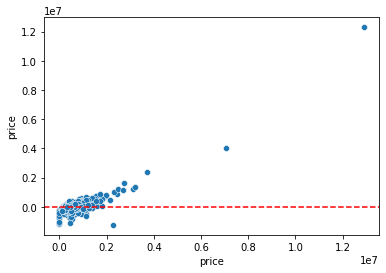

In [35]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [36]:
len(test_res)

1380

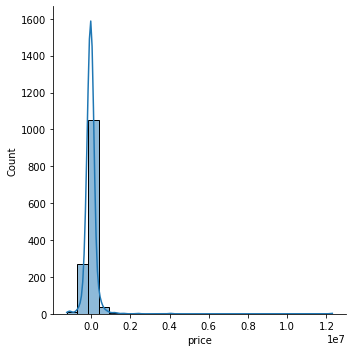

In [37]:
sns.displot(test_res,bins=25,kde=True)

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [38]:
import scipy as sp

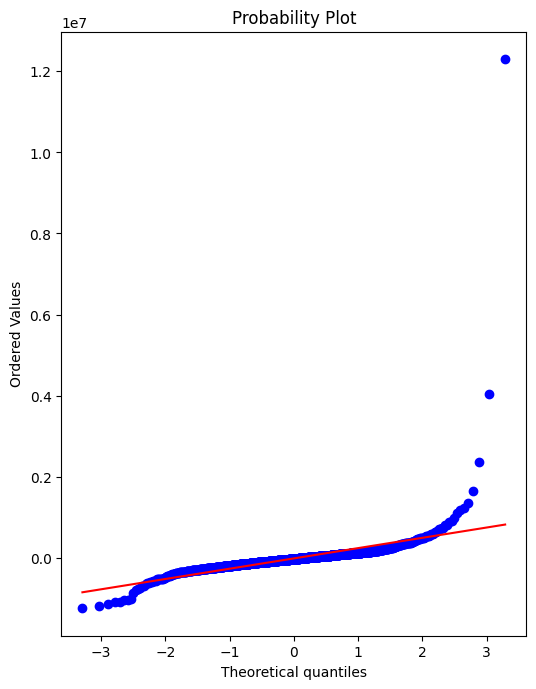

In [39]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

# Retraining Model on Full Data
##### If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [40]:
final_model = LinearRegression()

In [41]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

# Deployment, Predictions, and Model Attributes
### Final Model Fit


In [42]:
y_hat = final_model.predict(X)

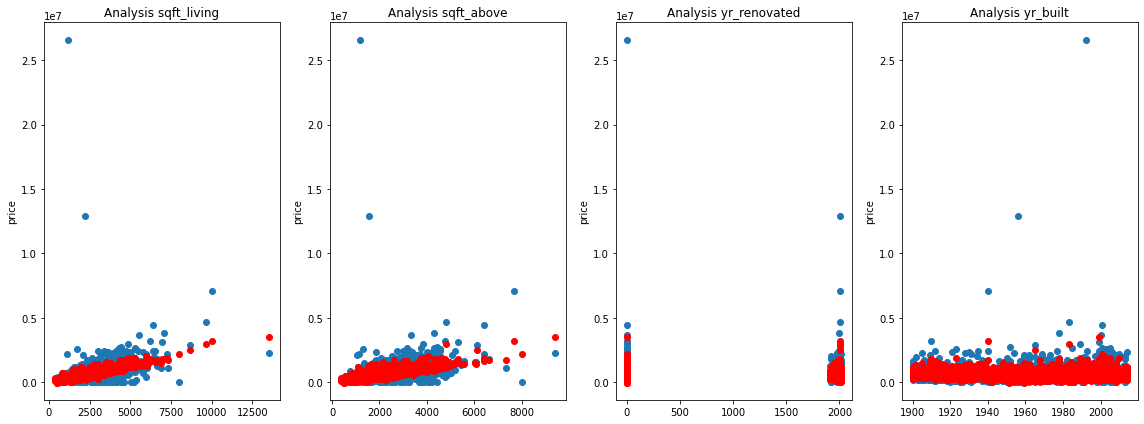

In [43]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))

axes[0].plot(df['sqft_living'],df['price'],'o')
axes[0].plot(df['sqft_living'],y_hat,'o',color='red')
axes[0].set_ylabel("price")
axes[0].set_title("Analysis sqft_living")

axes[1].plot(df['sqft_above'],df['price'],'o')
axes[1].plot(df['sqft_above'],y_hat,'o',color='red')
axes[1].set_ylabel("price")
axes[1].set_title("Analysis sqft_above")

axes[2].plot(df['yr_renovated'],df['price'],'o')
axes[2].plot(df['yr_renovated'],y_hat,'o',color='red')
axes[2].set_title("Analysis yr_renovated");
axes[2].set_ylabel("price")

axes[3].plot(df['yr_built'],df['price'],'o')
axes[3].plot(df['yr_built'],y_hat,'o',color='red')
axes[3].set_ylabel("price")
axes[3].set_title("Analysis yr_built")
plt.tight_layout();

#### Residuals

In [44]:
residuals = y_hat - y

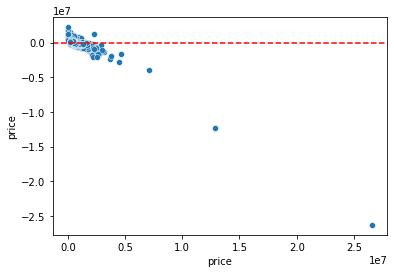

In [45]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

## Coefficients

In [46]:
final_model.coef_

array([-5.48095290e+04,  5.14189451e+04,  1.64647551e+02, -5.29320440e-01,
        2.42859215e+04,  3.96819626e+05,  4.62821525e+04,  3.53796520e+04,
        1.05181469e+02,  5.94660826e+01, -1.98264421e+03,  6.30486439e+00,
       -4.21403067e+03])

In [47]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-54809.528983
bathrooms,51418.945131
sqft_living,164.647551
sqft_lot,-0.529320
floors,24285.921536
waterfront,396819.625831
view,46282.152455
condition,35379.652030
sqft_above,105.181469
sqft_basement,59.466083


In [48]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,-0.033270
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,0.090115
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.081377
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.134670
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,0.197614
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,-0.008700
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.082089
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.019511
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.033943
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,0.189722


## Prediction on New Data

In [49]:
cost = {'bedrooms':3.0,'bathrooms':2.00,'sqft_living':1570,'sqft_lot':7500,'floors':2.0,'waterfront':0,'view':4,'condition':5,
          'sqft_above':3560,'sqft_basement':300,'yr_built':1932,'yr_renovated':2007,'city':2}
index=[1]#serial number
my_data=pd.DataFrame(cost,index)

In [50]:
print(my_data)

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1       3.0        2.0         1570      7500     2.0           0     4   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  
1          5        3560            300      1932          2007     2  


In [51]:
my_data_price=final_model.predict(my_data)
rounded_price = np.round(my_data_price, 2)
print(f" The predicted price for the given data is :{rounded_price}")

 The predicted price for the given data is :[1007162.11]


# Model Persistence (Saving and Loading a Model)

In [52]:
from joblib import dump, load

In [53]:
dump(final_model, 'housecost_model.joblib') 

['housecost_model.joblib']

In [54]:
loaded_model = load('housecost_model.joblib')

In [55]:
loaded_model.predict(my_data)
rounded_price = np.round(my_data_price, 2)
print(f" The predicted price for the given data is :{rounded_price}")


 The predicted price for the given data is :[1007162.11]


In [62]:
from pandas_profiling import ProfileReport


In [57]:
# !pip install ipywidgets

In [63]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4


In [60]:
prof = ProfileReport(df)


In [61]:
prof.to_file("House_Price.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices